## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

In [4]:
# Checking for Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Checking for measures of central tendency
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Grouping by region to see any relationship between region and premium charges
df_region = insurance_df.groupby(by = 'region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


#### From the above DataFrame we can observe that:
    1. Southeast region has the highest premium charges
    2. Southwest region has the lowest preium charges

In [7]:
# Grouping by age to see any relationship between age and premium charges
df_age = insurance_df.groupby(by = 'age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


#### On observing the above DataFrame we can conclude that:
    The medical premium charges is increasing gradually with age. This makes sense, with increase in age, health related issues tend to increase which in turn leads to increased premium charges.

## Feature Engineering

In [8]:
# Checking for unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
# Converting categorical variable ('sex') to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [10]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [11]:
# Checking for unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
# Converting categorical variable ('smoker') to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [13]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
# Checking for unique values in the 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
# Encodes the values of each region in binary (001 - 'Southwest' for first row)
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [16]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)
insurance_df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,1


In [17]:
# Dropping the 'region' column as it is redundant
insurance_df.drop(['region'], axis = 1, inplace = True)

In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


## Data Visualization

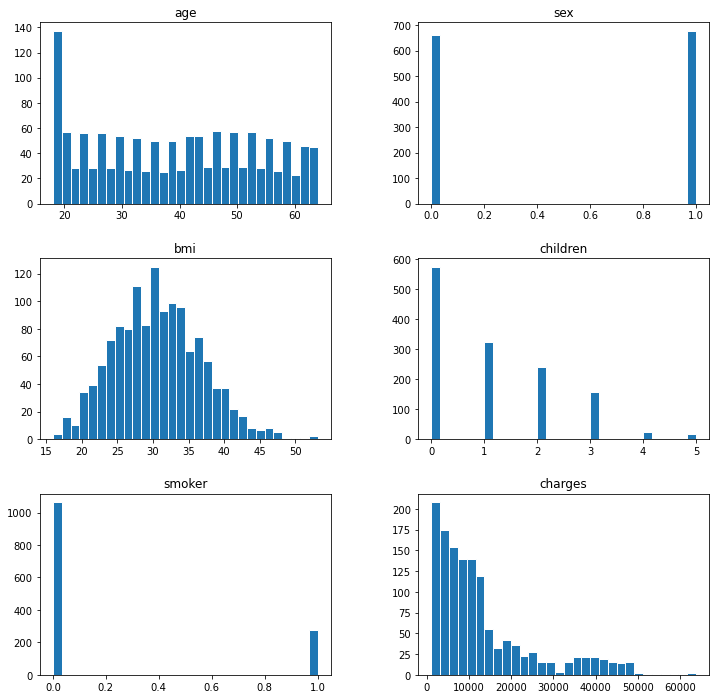

In [19]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12,12), 
                                                                          edgecolor = 'white', 
                                                                          grid = False)
plt.show()

#### From the above histogram plots we can observer that:
    1. The most common age group is just beyond 20 years, maybe 19.
    2. The number of male and female are equally represented in the data.
    3. The bmi looks like a normal distribution with mean around 30.
    4. Maximum people have no children (0).
    5. There are not many people who smoke, around 250 people are there who might look like they smoke.
    6. The charges distribution appears to be right skewed.

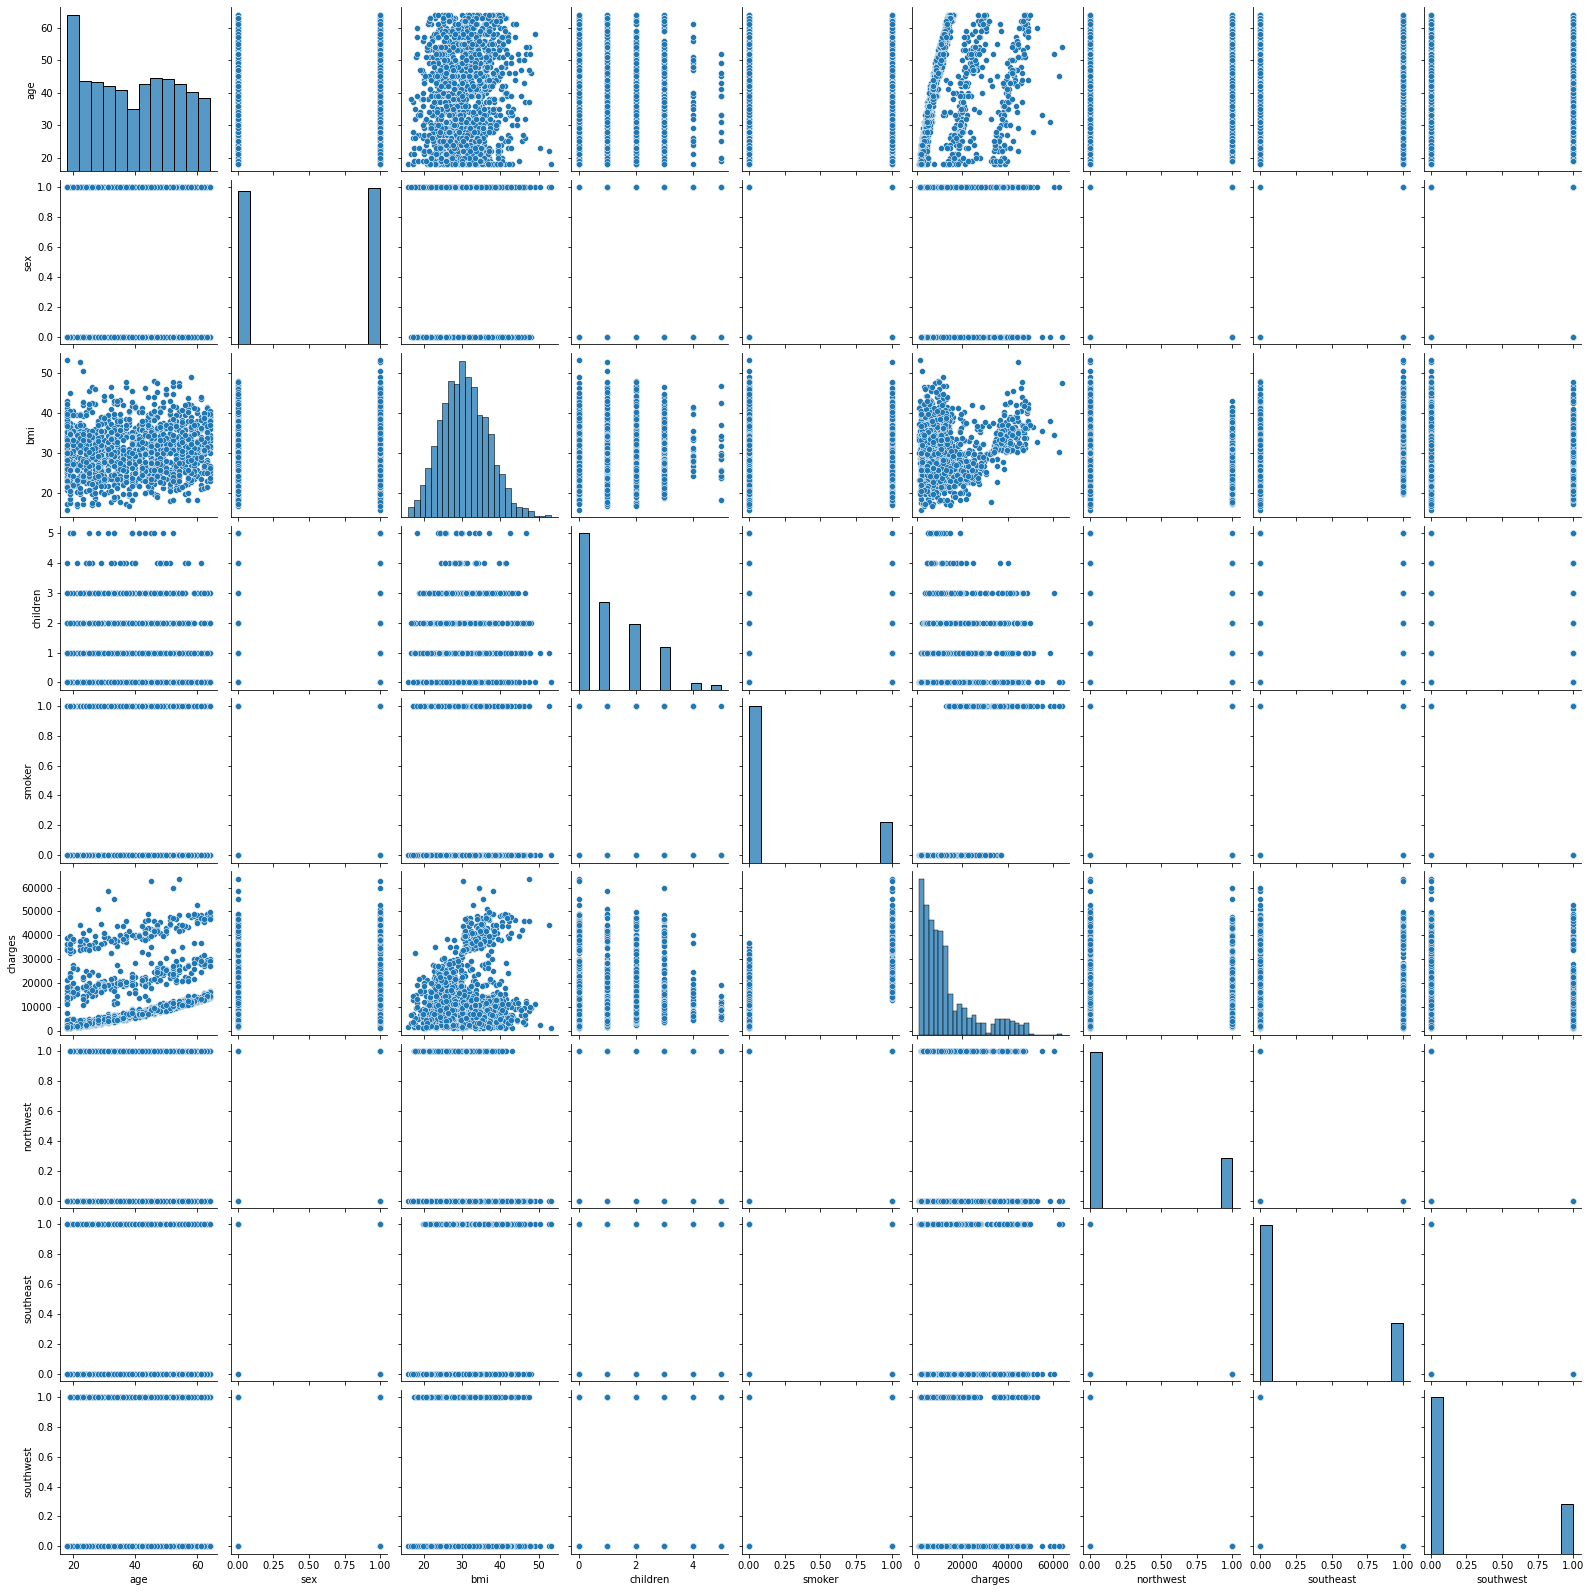

In [20]:
# Plot pairplot
sns.pairplot(insurance_df)
plt.show()

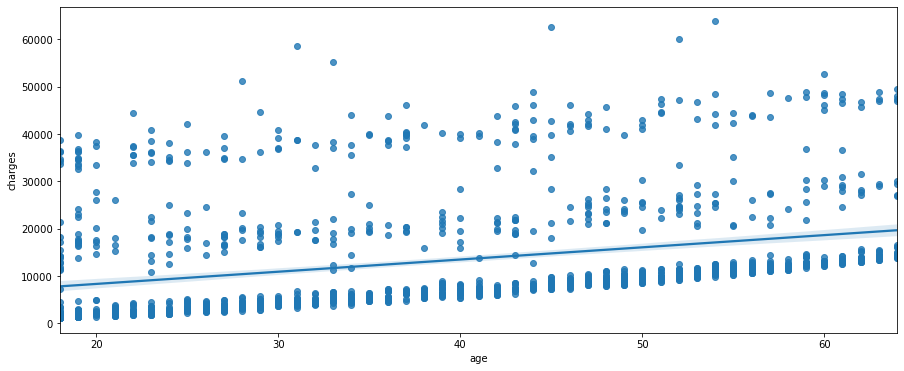

In [21]:
# Regression Plot - age v/s charges

plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

    The regression plot above with age as a predictor of the target variable charges, shows the best fit line through all the data points, which implies that they have a linear relationship

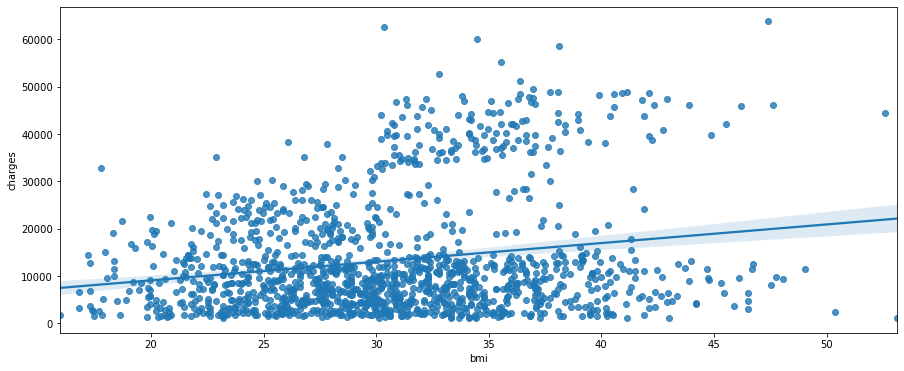

In [22]:
# Regression Plot - bmi v/s charges

plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

    The above regression plot with bmi as a predictor of target variable - charges, portrays a similar relationship as age did with charges - linear

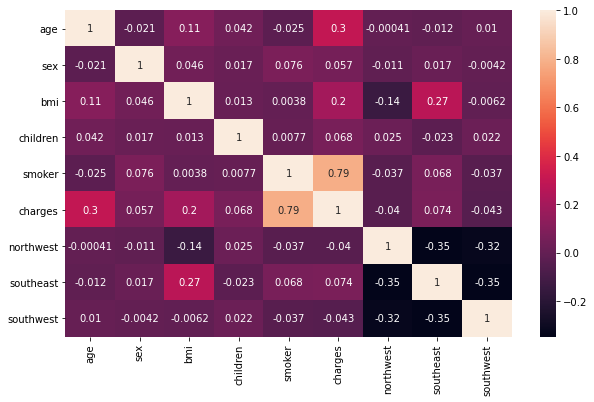

In [23]:
# Correlation Plot

plt.figure(figsize = (10, 6))
sns.heatmap(insurance_df.corr(), annot = True)
plt.show()

#### From the heatmap - 
    - smoker has the most positive correlation with charges (0.79)
    - age has the most negative correlation with charges (-0.025)
    - charges and age are correlated (0.3) which we saw earlier with the regression plot
    - bmi and charges are also correlated (0.2), but slightly lower as compared to age with charges

## Training and Testing Dataset

In [24]:
X = insurance_df.drop(columns = 'charges')
y = insurance_df['charges']

In [25]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [28]:
y = y.reshape(-1, 1)

In [29]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [30]:
X.shape

(1338, 8)

In [31]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [32]:
y.shape

(1338, 1)

In [33]:
# Scaling the data before entering it into the machine learning model

from sklearn.preprocessing  import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [34]:
# Building testing and training dataset - 80% for training, 20% for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


#### Training Regression Model
    Training a regression model using the training data (X_train as input features and y_train as target values) by fitting the model to learn the patterns and relationships between the features and the target

In [35]:
# Using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression() # instantiaiting an object of class LinearRegression
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [36]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.6953286624159107

$R^{2}$ = 69.5%
    
    This score indicates the model's predictive performance on unseen data, with a higher R² value indicating better performance (closer to 1.0)

In [37]:
y_predict = regression_model_sklearn.predict(X_test)

In [38]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [39]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1)/(n - k - 1)

print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6536.847 
MSE = 42730370.0 
MAE = 4555.099 
R2 = 0.6953286761178654 
Adjusted R2 = 0.6859179788550968


## Artificial Neural Network-Based Regression Model

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [42]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7

#### From the summary:
    We have around 38,351 trainable parameters - the artificial neural network parameters that we will optimize
    

In [43]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 3s 64ms/step - loss: 0.4347 - val_loss: 0.1975
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1423 - val_loss: 0.2006
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1366 - val_loss: 0.2028
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1371 - val_loss: 0.1746
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1212 - val_loss: 0.1826
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1255 - val_loss: 0.1819
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0972 - val_loss: 0.1864
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1867
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1158 - val_loss: 0.1854
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.1865
Epoch 11

43/43 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.2357
Epoch 84/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.2343
Epoch 85/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.2250
Epoch 86/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.2368
Epoch 87/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.2373
Epoch 88/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.2217
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.2307
Epoch 90/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.2278
Epoch 91/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.2450
Epoch 92/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.2319
Epoch 93/100


In [44]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2764
Accuracy : 0.7235988080501556


In [45]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

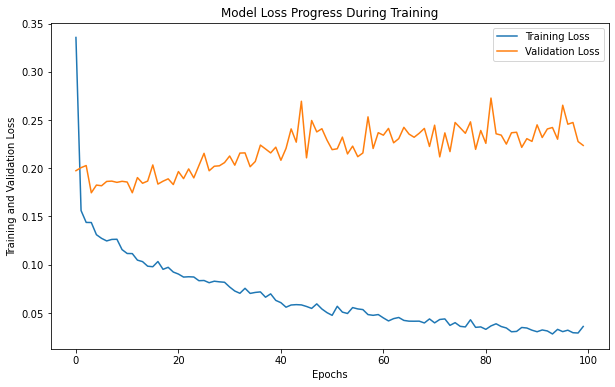

In [46]:
plt.figure(figsize = (10, 6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

#### Training loss v/s Validation loss

    The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data.
    The training loss is stable.
    The validation loss is increasing which means that the model is overfitting the new data (test dataset).

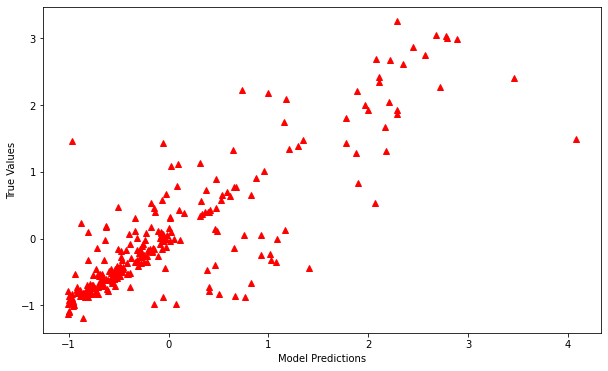

In [47]:
y_predict = ANN_model.predict(X_test)
plt.figure(figsize = (10, 6))
plt.plot(y_test, y_predict, "^", color = "r")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")
plt.show()

    The linearity in the above scatter plot might be due to normalization of the values, this might not be the actual representation of the relationship between predicted and true values. Thus, to get an accurate representation we transform the values back to their original values.

In [48]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

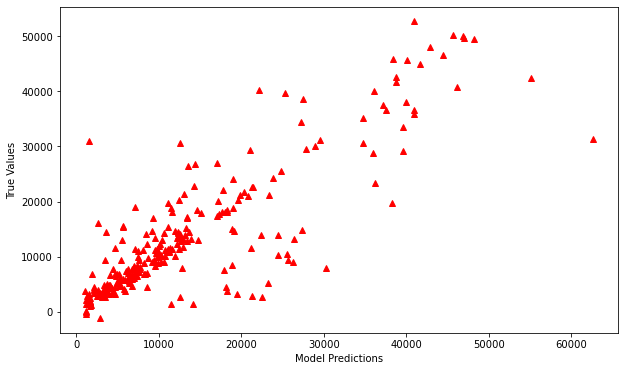

In [49]:
plt.figure(figsize = (10, 6))
plt.plot(y_test_orig, y_predict_orig, "^", color = "r")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")
plt.show()

    From the above plot we can observe that a couple of data points are away from the true values - which implies that the prediction of the model is different from the true values.

In [50]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [51]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1)/(n - k - 1)

print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6364.321 
MSE = 40504588.0 
MAE = 3692.3433 
R2 = 0.7111986795241545 
Adjusted R2 = 0.7022781754167924


## Improving the model

### Dropout

    Regularization technique that is used to improve the network generalization ability. Dropout breaks inter-unit relations and focuses more on generalisation - which in turn reduces the overfitting problem of the model.

In [52]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5)) # Drop 50% of the neurons and connected weights associated with them
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')

ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                450       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [ ]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.8481 - val_loss: 0.2523
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3752 - val_loss: 0.2016
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2982 - val_loss: 0.1944
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2757 - val_loss: 0.1912
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2305 - val_loss: 0.2059
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2425 - val_loss: 0.1850
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1907 - val_loss: 0.1941
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2563 - val_loss: 0.1835
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2357 - val_loss: 0.1874
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2461 - val_loss: 0.1971
Epoch 11/

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training (Improved)')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
y_predict = regression_model_sklearn.predict(X_test)

In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(y_test_orig, y_predict_orig, "^", color = "r")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")
plt.show()

In [ ]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1)/(n - k - 1)

print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)